# EDA_FE 과제 
#### <font color='orange'> - 약간 매운맛

by YBIGTA 16기 DA Team 김지환

<img src='https://i.imgur.com/cqdVyfs.jpg'>


---
여러분은 Airbnb 런던 지사의 데이터 분석가입니다.

이번에 호스트들에게 적정한 방 가격을 책정해주는 프로젝트를 진행할 예정입니다.

이를 위해 기존에 런던에 있던 Airbnb 방 데이터를 분석할 것입니다.

각 문제에 대해 적절한 코드 혹은 답변을 제시해보세요.

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 코드. 버전에 따라 필요 없을 수도 있습니다.
import seaborn as sns

In [2]:
df = pd.read_csv('airbnb_listings.csv', index_col=0)

c:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (25,26,47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

# EDA

### 1) 전체 데이터 확인

- #### <font color='orange'> Q1. 상위 5개의 데이터를 확인해보세요. 컬럼 수가 많으니 모든 컬럼을 표시하도록 조정하세요. </font>

In [4]:
# Q1
pd.set_option('display.max_columns', None)
df.head()

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighborhood,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
0,2060,a few days or more,22%,50%,f,0.0,0.0,['reviews'],t,f,Manhattan,40.85722,-73.93790,t,Other,Private room,2,NaN,1.0,2.0,Real Bed,"{Internet,Wifi}",NaN,100,NaN,NaN,NaN,1,$0.00,1,730,t,30,60,90,365,1,0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,flexible,f,f,0.01
1,2595,within a day,87%,38%,f,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,Manhattan,40.75362,-73.98377,f,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",NaN,225,"$1,995.00",NaN,$350.00,1,$0.00,7,1125,t,4,34,64,339,48,5,94.0,9.0,9.0,10.0,10.0,10.0,9.0,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,0.38
2,3831,within an hour,83%,96%,f,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,Brooklyn,40.68514,-73.95976,t,Guest suite,Entire home/apt,3,1.0,1.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",500.0,89,$575.00,"$2,100.00",$500.00,1,$0.00,1,730,t,6,10,13,151,313,69,90.0,9.0,9.0,10.0,10.0,10.0,8.0,f,NaN,NaN,f,f,moderate,f,f,4.71
3,5099,NaN,NaN,71%,f,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,f,Manhattan,40.74767,-73.97500,f,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,200,NaN,NaN,$300.00,2,$100.00,3,21,t,0,0,0,0,78,8,90.0,10.0,9.0,10.0,10.0,10.0,9.0,f,NaN,NaN,f,f,moderate,t,t,0.59
4,5114,within a day,50%,NaN,f,3.0,3.0,"['email', 'phone', 'reviews']",t,f,Manhattan,40.71910,-73.99040,t,Apartment,Private room,2,NaN,1.0,1.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,E...",NaN,94,NaN,NaN,NaN,1,$13.00,1,730,t,30,60,90,109,75,0,94.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,0.56


---
### 2) 결측치 확인

- #### <font color='orange'> Q2. 각 컬럼의 결측치를 확인하고, 결측치가 많은 순서대로 결측치 비율과 함께 표로 나타내보세요.
<font color='orange'> (결측치 0개인 컬럼은 나타내지 마세요)

In [5]:
# Q2

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50796 entries, 0 to 50795
Data columns (total 54 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                50796 non-null  int64  
 1   host_response_time                31790 non-null  object 
 2   host_response_rate                31790 non-null  object 
 3   host_acceptance_rate              36781 non-null  object 
 4   host_is_superhost                 50791 non-null  object 
 5   host_listings_count               50791 non-null  float64
 6   host_total_listings_count         50791 non-null  float64
 7   host_verifications                50796 non-null  object 
 8   host_has_profile_pic              50791 non-null  object 
 9   host_identity_verified            50791 non-null  object 
 10  neighborhood                      50796 non-null  object 
 11  latitude                          50796 non-null  float64
 12  long

In [6]:
#Q2 
miss_df = pd.DataFrame()
miss_df['missing_num'] = df.isnull().sum().sort_values(0, ascending = False)
miss_df['missing_%'] = round(df.isnull().sum()/len(df)*100, 1)
miss_df = miss_df[miss_df['missing_num']>0]
miss_df

,missing_num,missing_%
jurisdiction_names,50781,100.0
license,50759,99.9
square_feet,50407,99.2
monthly_price,46119,90.8
weekly_price,45411,89.4
host_response_rate,19006,37.4
host_response_time,19006,37.4
security_deposit,17325,34.1
host_acceptance_rate,14015,27.6
review_scores_location,11482,22.6


- #### <font color='orange'> Q3. 결측치가 있는 컬럼과 결측치 비율을 보기쉽게 그래프로 나타내 보세요.

<AxesSubplot:ylabel='missing_%'>

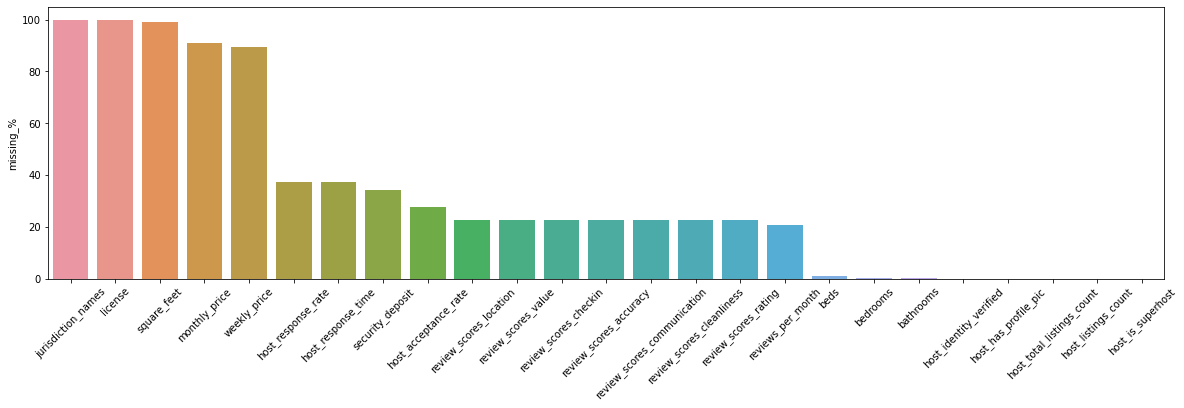

In [7]:
# Q3
plt.figure(figsize = [20, 5])
plt.xticks(rotation = 45)
sns.barplot(x = miss_df.index, y = miss_df['missing_%'])

- #### <font color='orange'> Q4. 결측치가 적은 beds 컬럼을 좀 더 자세히 살펴보겠습니다. 
  #### <font color='orange'> 'beds' 컬럼이 결측치인 데이터의 상위 5개를 출력해주세요.

In [8]:
# Q4

df[df['beds'].isnull()].head()

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighborhood,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
808,321845,NaN,NaN,NaN,f,0.0,0.0,['email'],t,f,Manhattan,40.70850,-74.01795,t,Apartment,Private room,2,NaN,1.0,NaN,Real Bed,{},NaN,150,$500.00,"$1,600.00",NaN,1,$0.00,1,1125,t,30,60,90,365,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,NaN
1002,468613,NaN,NaN,NaN,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,Manhattan,40.72152,-73.99279,t,Apartment,Private room,1,NaN,1.0,NaN,Real Bed,{},NaN,1300,NaN,NaN,NaN,1,$0.00,1,1125,t,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,flexible,f,f,NaN
1058,499249,NaN,NaN,0%,f,1.0,1.0,"['email', 'phone', 'reviews', 'offline_governm...",t,f,Brooklyn,40.70528,-73.95756,t,Apartment,Private room,1,NaN,1.0,NaN,Real Bed,{},NaN,190,NaN,NaN,$0.00,1,$100.00,1,218,t,30,60,90,365,1,0,NaN,10.0,8.0,10.0,10.0,10.0,10.0,f,NaN,NaN,t,f,strict_14_with_grace_period,f,f,0.01
1074,505231,NaN,NaN,NaN,f,1.0,1.0,"['email', 'phone', 'reviews']",t,f,Manhattan,40.77799,-73.95223,t,Apartment,Private room,1,NaN,1.0,NaN,Real Bed,{},NaN,80,$700.00,"$3,000.00",NaN,1,$0.00,1,60,t,0,0,0,0,1,0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,f,f,moderate,f,f,0.01
1208,587519,NaN,NaN,0%,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews']",t,f,Brooklyn,40.71099,-73.95217,t,Apartment,Private room,1,1.0,1.0,NaN,Real Bed,{},NaN,48,NaN,NaN,NaN,1,$0.00,5,30,t,0,0,0,0,1,0,80.0,6.0,6.0,10.0,10.0,10.0,6.0,f,NaN,NaN,f,f,flexible,f,f,0.02


---
### 3) 범주형 변수 확인
<font color='gray'> - 편의를 위해 결측치가 있는 컬럼을 모두 제거하고 진행하겠습니다.

In [9]:
drop_col = ['jurisdiction_names', 'license', 'square_feet', 'monthly_price',
       'weekly_price', 'host_response_rate', 'host_response_time',
       'security_deposit', 'host_acceptance_rate', 'review_scores_location',
       'review_scores_value', 'review_scores_checkin',
       'review_scores_accuracy', 'review_scores_communication',
       'review_scores_cleanliness', 'review_scores_rating',
       'reviews_per_month', 'beds']

In [10]:
df = df.drop(columns=drop_col)

- #### 각 컬럼별 변수 타입 확인

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50796 entries, 0 to 50795
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                50796 non-null  int64  
 1   host_is_superhost                 50791 non-null  object 
 2   host_listings_count               50791 non-null  float64
 3   host_total_listings_count         50791 non-null  float64
 4   host_verifications                50796 non-null  object 
 5   host_has_profile_pic              50791 non-null  object 
 6   host_identity_verified            50791 non-null  object 
 7   neighborhood                      50796 non-null  object 
 8   latitude                          50796 non-null  float64
 9   longitude                         50796 non-null  float64
 10  is_location_exact                 50796 non-null  object 
 11  property_type                     50796 non-null  object 
 12  room

- #### <font color='orange'> Q5. Room Type 에는 어떤 것들이 있는지 살펴보겠습니다. 
#### <font color='orange'> room_type의 종류별 갯수에 대한 그래프를 그려주세요.

<AxesSubplot:xlabel='room_type', ylabel='count'>

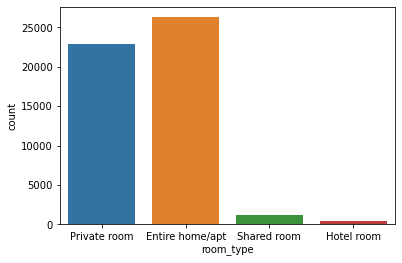

In [12]:
# Q5
sns.countplot(x=df['room_type'])

- #### <font color='orange'> Q6. 위 그래프의 세로축이 갯수가 아닌 비율을 나타내도록 재구성해보세요.

<AxesSubplot:ylabel='room_type'>

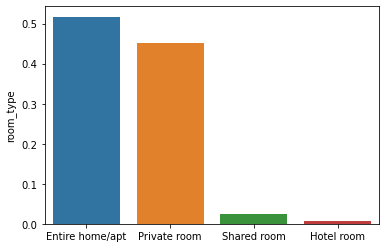

In [13]:
# Q6

sns.barplot(x=pd.DataFrame(df['room_type'].value_counts(normalize=True)).index, y=df['room_type'].value_counts(normalize=True))

- #### <font color='orange'> Q7. 각 지역별로 room_type의 비율이 어땠는 지 알고 싶습니다.
#### <font color='orange'> 아래 그래프와 같이 각 지역별로 room_type의 갯수가 어땠는지 보여주세요.    

<AxesSubplot:xlabel='neighborhood', ylabel='count'>

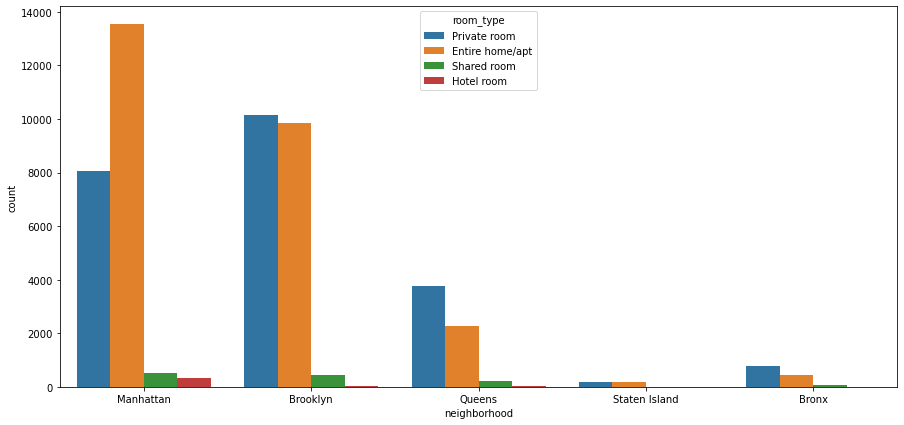

In [14]:
# Q7

plt.figure(figsize=(15, 7))
sns.countplot(x=df['neighborhood'], hue=df['room_type'])

- #### <font color='orange'> Q8. 각 지역별로 가격의 분포가 어떤지 알고 싶습니다.
#### <font color='orange'> 아래 그래프와 같이 각 지역별로 가격의 분포를 보여주세요.

<AxesSubplot:xlabel='neighborhood', ylabel='price'>

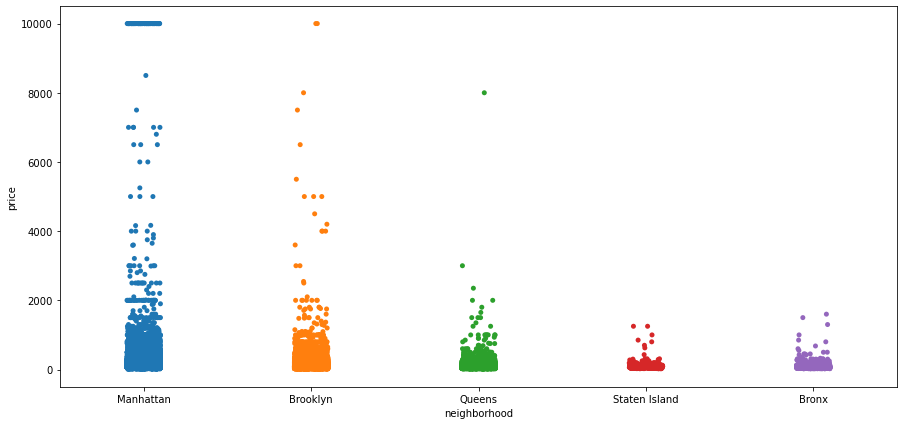

In [15]:
# Q8
# plt.figure() 여기부턴 직접 사이즈 조절해보세요

plt.figure(figsize=(15, 7))
sns.stripplot(x = 'neighborhood', y = 'price', data = df)

- #### <font color='orange'> Q9. 위 그래프들로부터 알 수 있는 사실은 무엇인가요? 그 이유는 무엇이라고 생각하시나요?

Q9


먼저 방 종류별 개수 그래프(Q5)를 살펴보면, airbnb에는 entire home/apt, private room, shared room, hotel room 순으로 방 종류가 많은 것을 확인할 수 있습니다. 덧붙여 비율로 기준을 변경하여 확인해본 그래프(Q6)에서도 그 순서가 그대로인 것을 살펴볼 수 있었습니다. 즉, airbnb에 등록된 방들은 entire home/apt, private room, shared room, hotel room 순으로 높은 비율을 차지하고 있음을 확인할 수 있습니다. 이는 airbnb가 일반적으로 독립적인 공간을 대여하기 위해 많이 사용되는 것으로 인식되는 것과 연관이 있을 것으로 예측할 수 있습니다.

다음으로 지역별 방 종류 개수 그래프(Q7)를 살펴보면 Manhattan엔 entire home/apt가 가장 많은 방 유형을 차지하고, 다른 지역에서는 entire home/apt보다 private room이 더 많은 방 유형을 차지하고 있는 것을 확인할 수 있습니다. 그럼에도 불구하고 전체적으로 살펴봤을 때 entire home/apt가 가장 비율이 높았던 것은 Manhattan의 airbnb 방 개수가 다른 지역에 비해 압도적으로 많은 것으로 생각할 수 있습니다. 

또한 각 지역별 가격 분포 그래프(Q8)를 살펴보았을때, 일반적으로는 가격이 2000 이하인 경우가 대다수이며, 그것보다 비싼 방들은 주로 Manhattan, Brooklyen에 분포하는 것을 확인할 수 있습니다. 특히 10000에 가까운 가장 비싼 방의 경우에는 Manhattan에 많이 위치하고 있고, Brooklyn이 그 다음으로 고가의 방들이 많이 있는 것을 확인할 수 있습니다. 뿐만 아니라, 절대적인 airbnb에 등록된 방의 개수가 Manhattan, Brooklyn, Queens, Bronx, Staten Island 순으로 많이 존재하며, 이러한 점들을 미루어보았을 때 Manhattan과 Brooklyn이 가장 핵심적인 위치의 도심에 위치하고 있을 것으로 예상할 수 있습니다.

---
### 4) 연속형 변수 확인

- #### <font color='orange'> Q10. 각 방의 수용가능인원의 분포를 알고싶습니다.
#### <font color='orange'> 'accommodates' 칼럼에 대한 히스토그램을 그려주세요.

<AxesSubplot:xlabel='accommodates', ylabel='Count'>

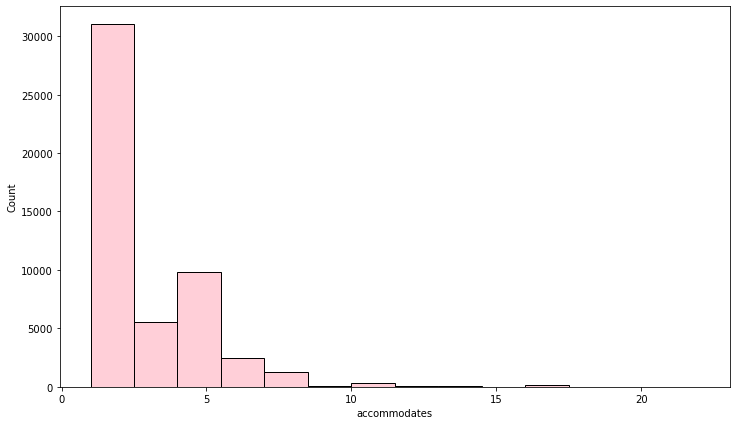

In [16]:
# Q10

plt.figure(figsize=(12, 7))
sns.histplot(data=df, x='accommodates', binwidth=1.5, color='pink')

- #### <font color='orange'> Q11. 각 방의 가격의 분포를 알고 싶습니다.
#### <font color='orange'> 'price' 칼럼에 대한 히스토그램을 그려주세요. 범위는 0~1000까지만 보여주세요.

<AxesSubplot:xlabel='price', ylabel='Count'>

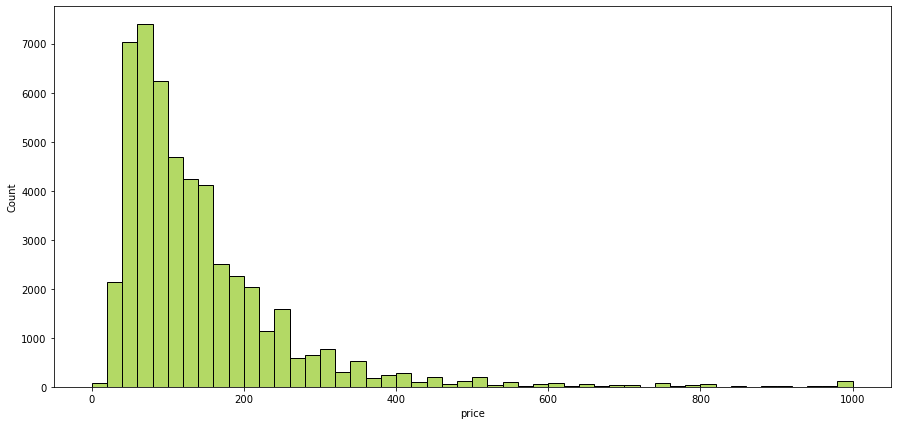

In [17]:
# Q11

plt.figure(figsize=(15, 7))
sns.histplot(data=df, x='price', binwidth=20, binrange=(0, 1000), color='yellowgreen')

* **굵은 텍스트** Q3 hint

<font color='white'> x축 라벨을 45도 기울이려면 plot.set_xticklabels()을 찾아보세요. </font>



---
### 5) Feature Engineering

feature에 대한 전처리를 하기 이전에 결측치가 있는 column을 모두 제거했는데, 다시 초기 상태로 되돌리고 진행하겠습니다.

In [18]:
df = pd.read_csv('airbnb_listings.csv', index_col=0)

c:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (25,26,47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


- #### <font color='orange'> Q12. 결측치에 대한 처리를 하고 싶습니다.
#### <font color='orange'> 주어진 모든 column들에 대하여 결측치가 25%이상인 경우에는 column을 drop하고 10%이상 25%미만인 경우에는 결측치가 있는 row만 drop하고, 10%미만인 경우에는 중앙값으로 대체해주세요.

In [19]:
#Q12

# 25% 이상
df.drop(df.columns[df.isnull().sum()/len(df)*100 >= 25], axis=1, inplace=True)

# 10% 이상 25% 미만
df.dropna(subset=df.columns[df.isnull().sum()/len(df)*100 >= 10], inplace=True)

# 10% 미만 0% 초과: str(최빈값)
str_df = df.loc[:,df.loc[:, df.columns[(df.isnull().sum()/len(df)*100 > 0)]].columns[df.loc[:, df.columns[(df.isnull().sum()/len(df)*100 > 0)]].dtypes == object]]
mode = str_df.value_counts().idxmax()
df.loc[:, str_df.columns[0]].fillna(mode[0], inplace=True)
df.loc[:, str_df.columns[1]].fillna(mode[1], inplace=True)
df.loc[:, str_df.columns[2]].fillna(mode[2], inplace=True)

# 10% 미만 0% 초과: float(중앙값)
df.fillna(df.median(), inplace=True)

In [20]:
# 확인
df.isnull().sum()

id                                  0
host_is_superhost                   0
host_listings_count                 0
host_total_listings_count           0
host_verifications                  0
host_has_profile_pic                0
host_identity_verified              0
neighborhood                        0
latitude                            0
longitude                           0
is_location_exact                   0
property_type                       0
room_type                           0
accommodates                        0
bathrooms                           0
bedrooms                            0
beds                                0
bed_type                            0
amenities                           0
price                               0
guests_included                     0
extra_people                        0
minimum_nights                      0
maximum_nights                      0
has_availability                    0
availability_30                     0
availability

- #### <font color='orange'> Q13. 앞서 진행한 EDA를 바탕으로 FE를 진행하고자 합니다..
#### <font color='orange'> 총 3개의 FE를 진행하시고, 해당 FE를 진행한 이유에 대해 **간단히** 작성해주세요.


In [21]:
#Q13-1)

# EDA 결과, room_type에 따라 지역의 특징 구별이나 방 가격에 상관관계가 있을 것으로 예상되므로, 해당 변수를 머신 러닝 과정에서 처리할 수 있도록 one-hot encoding 적용
pd.get_dummies(df['room_type'])

,Entire home/apt,Hotel room,Private room,Shared room
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,0,0,1,0
5,0,0,1,0
...,...,...,...,...
50490,0,0,1,0
50526,0,0,1,0
50598,0,0,1,0
50650,1,0,0,0


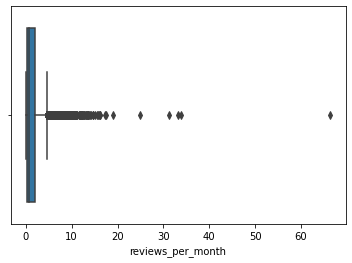

1        unpopular
2     semi_popular
3        unpopular
4        unpopular
5        unpopular
6     semi_popular
7        unpopular
8        unpopular
9        unpopular
10       unpopular
11       unpopular
12       unpopular
13       unpopular
14       unpopular
15       unpopular
16       unpopular
17    semi_popular
19       unpopular
20       unpopular
21       unpopular
22       unpopular
24       unpopular
25       unpopular
26       unpopular
27       unpopular
28       unpopular
29       unpopular
30       unpopular
32       unpopular
33       unpopular
Name: popularness, dtype: object

In [22]:
#Q13-2)

sns.boxplot(x=df['reviews_per_month'])
plt.show()
# reviews_per_month 변수가 높을수록 많은 인원이 방문했고 리뷰가 활발히 달리는 것을 의미하므로, boxplot 확인 후 3 이하는 unpopular, 3~15는 semi_popular, 15 초과는 very_popular로 지표변수 생성
popularness = []
for x in df['reviews_per_month']:
    if (x <= 3):
        popularness.append('unpopular')
    elif (3 < x <= 15):
        popularness.append('semi_popular')
    else:
        popularness.append('very_popular')

df['popularness'] = popularness
df['popularness'].head(30)

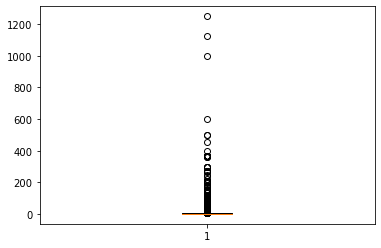

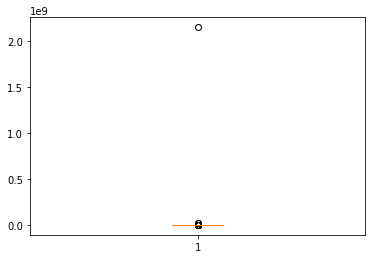

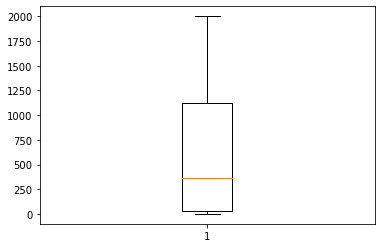

<ipython-input-24-ae4dc2c71eda>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['maximum_nights'][df['maximum_nights'].sort_values()[-12:].index] = 2000


In [24]:
#Q13-3)

plt.boxplot(df['minimum_nights'])
plt.show()
plt.boxplot(df['maximum_nights'])
plt.show()
plt.boxplot(df['maximum_nights'].sort_values()[:-12])
plt.show()

'''
minimum_nights, maximum_nights는 일 기준으로 절대적인 수치보다는 상대적인 수치가 price에 영향을 미칠 것이고, 
그것을 단순 일수 기준으로 모델링 하는 것보다는, scaling 결과값을 통해서 모델링 하는 것이 절대적인 일수 수치에 대햔 영향력을 줄이고 상대적인 영향력을 키울 수 있으므로 scaling을 진행했습니다.
이때 boxplot을 확인해보면 maximum_nights는 outlier들이 매우 극단적이므로, EDA를 통해 수치 상위 12개를 상위 13번째 값으로 변경해준 후 scaling을 진행했습니다.
덧붙여, scaler 중 standard scaling은 normal distribution을 따르는 data에 적합한데 반해 현 데이터는 normal distribution을 따른다고 보기 어려우므로, minmax scaling을 적용했습니다.
'''

df['maximum_nights'][df['maximum_nights'].sort_values()[-12:].index] = 2000

from sklearn.preprocessing import MinMaxScaler
mm_scaler1 = MinMaxScaler()
mm_scaler1 = mm_scaler1.fit_transform(df['minimum_nights'].values.reshape(-1,1))
df['mm_scaled_minimum_nights'] = mm_scaler1

mm_scaler2 = MinMaxScaler()
mm_scaler2 = mm_scaler2.fit_transform(df['maximum_nights'].values.reshape(-1,1))
df['mm_scaled_maximum_nights'] = mm_scaler2

---

EDA는 언뜻보면 불필요해 보이는 과정이지만, 실제 데이터를 다룰때 매우매우 중요한 과정입니다.

때문에 기본적인 개념 및 시각화 방법은 숙지해 두시는 것이 좋습니다!

또한 FE를 통하여 여러분들이 실제로 필요한 모델에 필요한 변수 형태를 띄게 변수를 바꿔주는 과정 또한 필수적인 과정이니, 다양한 방법의 FE 역시 숙지해 두시는 게 좋습니다

---

* Q2 hint

<font color='white'> df의 null의 개수를 센 다음에, ".to_frame()" 을 써보세요. 
1. missingnum=df.isnull().sum()으로 우선 결측치확인
2. missingnum>0조건 만족시키는 missingnum 확인하기
3. missingnum을 column으로 하는 새로운 df생성
4. 새로운 df sort하기
5. missing_%를 새로운 column으로 추가
</font>

* **굵은 텍스트** Q3 hint

<font color='white'> x축 라벨을 45도 기울이려면 plot.set_xticklabels()을 찾아보세요. </font>
